In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
try:
    data = pd.read_csv('dataset/Mall_Customers.csv')
except FileNotFoundError:
    print("Error: 'Mall_Customers.csv' not found. Make sure the file is in the same directory as your script.")
    exit()

In [3]:
# Select relevant features for clustering: Annual Income and Spending Score
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
# --- Step 1: Determine the optimal number of clusters using the Elbow Method ---
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Elbow plot saved as elbow_plot.png


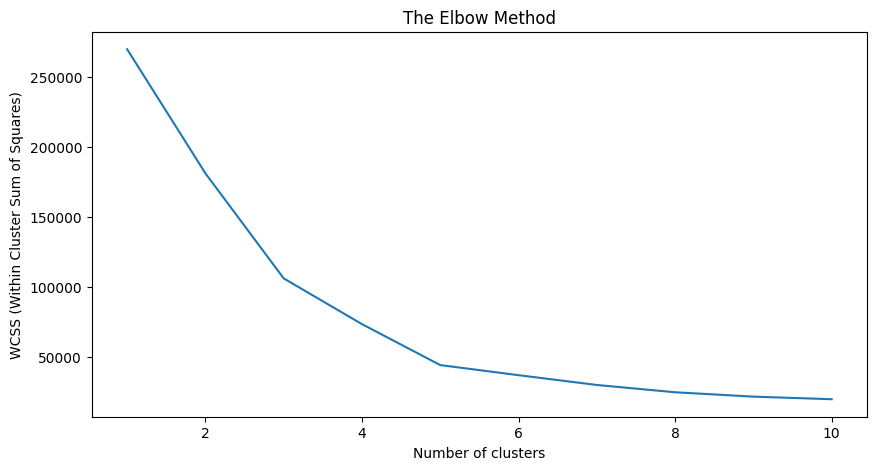

In [5]:
# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.savefig('elbow_plot.png')
print("Elbow plot saved as elbow_plot.png")

In [6]:
# --- Step 2: Apply K-means clustering with the optimal number of clusters ---
# From the elbow plot, we can observe that the "elbow" is at k=5, so we choose 5 clusters.
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

Customer cluster plot saved as customer_clusters.png


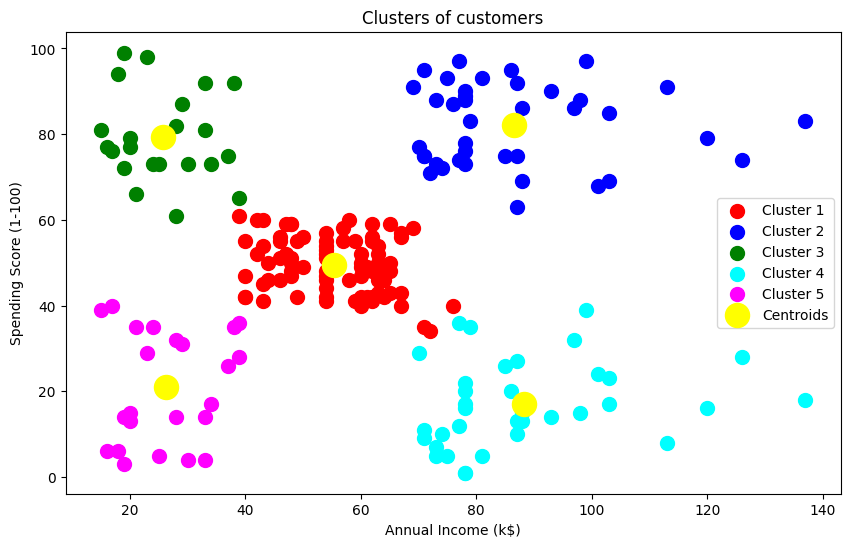

In [7]:
# --- Step 3: Visualize the clusters ---
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.savefig('customer_clusters.png')
print("Customer cluster plot saved as customer_clusters.png")

In [8]:
# --- Step 4: Add the cluster information to a copy of the original data ---

# Create a shallow copy of the original DataFrame
data_with_clusters = data.copy()

# Add the 'Cluster' column to the new DataFrame
data_with_clusters['Cluster'] = y_kmeans

# Save the new DataFrame with clusters to a CSV file
data_with_clusters.to_csv('Mall_Customers_Clusters.csv', index=False)

print("Clustered data saved to Mall_Customers_Clusters.csv")

Clustered data saved to Mall_Customers_Clusters.csv
